<a href="https://colab.research.google.com/github/tnv-pramod/DA_project1/blob/me/da%20project%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
x=pd.read_csv("/content/Netflix_data.csv")

In [114]:
value_mapping = {'PG-13': 'Adults only', 'TV-MA': 'Adults only', 'PG': 'parental guidance','TV-14':'Adults only','TV-PG':'parental guidance','TV-Y':'children watchable','TV-Y7':'age 7to above','R':'restricted','TV-G':'general audience','G':'general audience','NC-17':'Adults only','74 min':'60-90 min range','84 min':'60-90 min range','66 min':'60-90 min range','NR':'not rated','TV-Y7-FV':'age 7to above','UR':'not rated'}
x['rating'] = x['rating'].replace(value_mapping)

In [115]:
x.rename(columns={'listed_in': 'genere'}, inplace=True)

In [116]:
value_to_delete = '60-90 min range'

# Use loc to locate the rows where the value is equal to the value_to_delete and set the value to NaN
x.loc[x['rating'] == value_to_delete, 'rating'] = None

In [118]:
x = x.drop('date_added', axis=1)

In [121]:
mask = x['release_year'] > 2000
x =x[mask]
x = x.reset_index(drop=True)
x.head()

,type,title,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


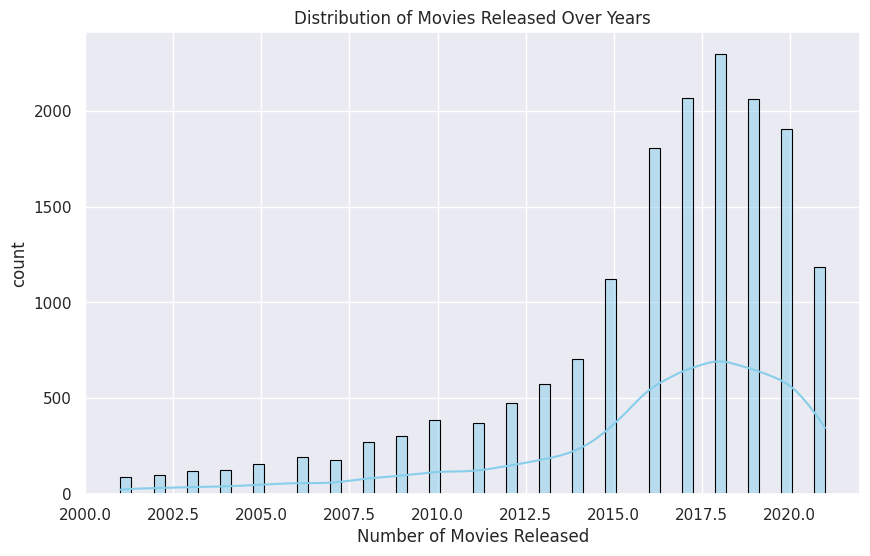

In [93]:
plt.figure(figsize=(10, 6))
sns.histplot(x['release_year'], bins='auto', kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Number of Movies Released')
plt.ylabel('count')
plt.title('Distribution of Movies Released Over Years')
plt.grid(True)
plt.show()

In [104]:
pd.set_option('display.max_rows', None)
value_counts = x['country'].value_counts()
print(value_counts)
#pd.reset_option('display.max_rows')

United States                                                                                                                  5110
India                                                                                                                          1768
United Kingdom                                                                                                                  800
Japan                                                                                                                           472
South Korea                                                                                                                     398
Canada                                                                                                                          358
Spain                                                                                                                           290
France                                                                      

In [127]:
value_counts = x['country'].value_counts()
values_to_keep = value_counts[value_counts > 100].index
mask = x['country'].isin(values_to_keep)
df= x[mask]
x.reset_index(drop=True, inplace=True)
values_to_keep

Index(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea',
       'Canada', 'Spain', 'France', 'Mexico', 'Turkey', 'Nigeria', 'Egypt',
       'Australia', 'Taiwan', 'Indonesia', 'Brazil', 'Philippines',
       'United States, Canada', 'Germany', 'China',
       'United Kingdom, United States', 'Thailand', 'Argentina'],
      dtype='object')

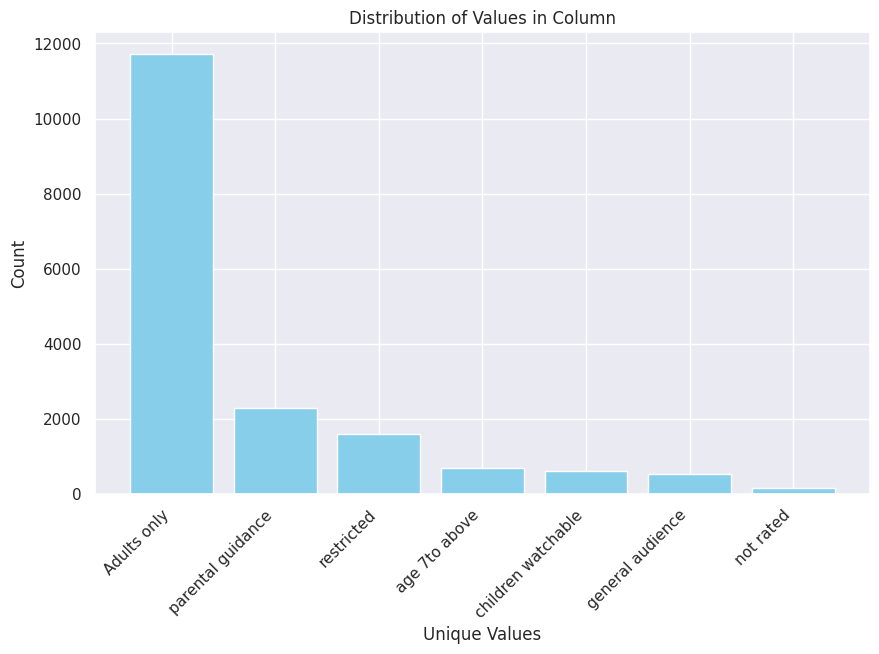

In [47]:
value_counts = x['rating'].value_counts()

# Create a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts, color='skyblue')  # You can change the color as per your preference
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Distribution of Values in Column')
plt.show()

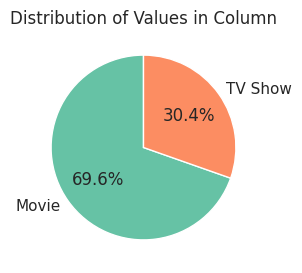

In [26]:
value_counts = x['type'].value_counts()
plt.figure(figsize=(3,3))
sns.set_palette('Set2')  # You can change the palette as per your preference
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Values in Column')
plt.show()